# Labeling: Excess Return Over Median

![image_example](img/distribution_over_median.png)
_*Fig. 1:*_ Distribution of excess over median return for 22 stock tickers from period between Jan 2019 and May 2020.

## Abstract

In this notebook, we demonstrate the method of labelling financial returns data according to excess over median. Using cross sectional data on returns of many different stocks, each observation is labelled according to whether or how much its return exceeds the median. Correlations can then be found between features and the likelihood that a stock will outperform the market.

This technique is used in the following paper:
["The benefits of tree-based models for stock selection"](https://link.springer.com/article/10.1057/jam.2012.17) by _Zhu et al._ (2012). 

In that paper, independent composite features are constructed as weighted averages of various parameters in fundemental and quantitative analysis, such as PE ratio, corporate cash flows, debt etc. The composite features are the applied as parameters in linear regression or a decision tree to predict whether a stock will outperform the market, as defined by excess over median.


## How it works

A dataframe containing forward total stock returns is calculated from close prices. The median return of all companies at time $t$ in the dataframe is used to represent the market return, and excess returns are calculated by subtracting the median return from each stock's return over the time period $t$ \[Zhu et al. 2012\]. The numerical returns over medians can then be used as is (for regression analysis), or can be relabelled simply to its sign (for classification analysis).

At time $t$:

$$X_t = \{x_{t,0}, x_{t,1}, x_{t,2} ...\}$$
$$m = median(X_t)$$
$$excess\_over\_median(X_t) = \{x_{t,0} - m, x_{t,1} - m, x_{t,2} - m ...\}$$

If categorical rather than numerical labels are desired:

$$
     \begin{equation}
     \begin{split}
       excess\_over\_median(x_{t,n}) = \begin{cases}
       -1 &\ \text{if} \ \ x_{t,n} - m < 0\\
       0 &\ \text{if} \ \ x_{t,n} - m = 0\\
       1 &\ \text{if} \ \ x_{t,n} - m > 0\\
       \end{cases}
     \end{split}
     \end{equation}
$$

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import excess_over_median

import matplotlib.pyplot as plt

In [2]:
# Load price data for 22 stocks
tickers = "AAPL MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM NVDA CVX AAL UBER C UA VZ NOK"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.head()

[*********************100%***********************]  22 of 22 completed


,ZM,BABA,AMD,CCL,AAL,MSFT,CVX,JPM,WFC,PFE,...,UA,VZ,UBER,FB,C,COST,NOK,NVDA,SYY,F
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,NaN,152.149994,19.760000,51.750248,32.219025,103.568062,105.162872,98.963676,46.484818,39.946537,...,18.590000,54.096535,NaN,147.570007,59.116608,209.413116,5.846427,148.102676,60.661575,7.837517
2019-01-23,NaN,152.029999,19.799999,51.512947,31.146364,104.577469,104.273567,98.713730,46.727222,39.842587,...,18.400000,54.827435,NaN,144.300003,59.384232,209.107468,5.924772,148.620316,60.884239,7.689988
2019-01-24,NaN,155.860001,20.850000,52.224846,33.124386,104.077667,106.258125,98.771400,46.596699,38.699097,...,18.860001,54.172474,NaN,145.830002,59.938599,207.352509,6.032495,157.131958,60.535717,7.929724
2019-01-25,NaN,159.210007,21.930000,52.689953,34.423378,105.028282,105.986641,99.396294,46.736546,38.406132,...,19.490000,53.536488,NaN,149.009995,61.190701,206.129929,6.463387,159.431610,60.041988,8.169458
2019-01-28,NaN,158.919998,20.180000,53.534740,35.988075,102.980049,105.003731,99.867378,46.447533,37.357147,...,19.370001,52.274014,NaN,147.470001,61.028221,207.806046,6.355664,137.390930,60.284012,7.985046


We find the excess return over median for all tickers in the time period, calculate the mean and standard deviation of returns, and plot the distribution.

In [3]:
excess1 = excess_over_median(data)
excess1.head()

,ZM,BABA,AMD,CCL,AAL,MSFT,CVX,JPM,WFC,PFE,...,UA,VZ,UBER,FB,C,COST,NOK,NVDA,SYY,F
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,NaN,-0.001406,0.001406,-0.005203,-0.033911,0.009129,-0.009074,-0.003143,0.004597,-0.003220,...,-0.010838,0.012893,NaN,-0.022777,0.003909,-0.002077,0.012783,0.002877,0.003053,-0.019441
2019-01-23,NaN,0.015223,0.043061,0.003851,0.053538,-0.014748,0.009063,-0.009385,-0.012762,-0.038669,...,0.015031,-0.021915,NaN,0.000634,-0.000634,-0.018362,0.008213,0.047302,-0.015693,0.021206
2019-01-24,NaN,0.003731,0.034036,-0.008857,0.021453,-0.008629,-0.020317,-0.011436,-0.014761,-0.025333,...,0.015642,-0.029502,NaN,0.004044,0.003127,-0.023659,0.053666,-0.003127,-0.025918,0.012470
2019-01-25,NaN,0.007443,-0.070535,0.025297,0.054719,-0.010238,-0.000010,0.014004,0.003080,-0.018049,...,0.003107,-0.014317,NaN,-0.001071,0.006609,0.017396,-0.007402,-0.128981,0.013295,-0.013309
2019-01-28,NaN,-0.007242,-0.040490,0.003112,-0.002062,-0.014771,0.002564,0.008386,0.006197,0.036963,...,-0.017121,-0.026909,NaN,-0.016647,-0.004429,0.003412,0.014840,-0.040851,0.002062,0.017142


Text(0.5, 0, 'Excess Over Median')

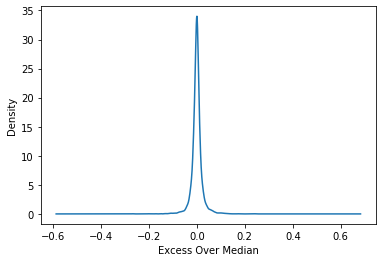

In [4]:
s = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax = s.plot.kde()
ax.set_xlabel('Excess Over Median')

We can also plot it as a histogram.

(-0.2, 0.2)

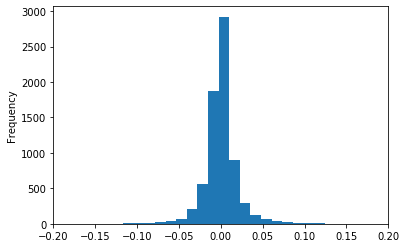

In [5]:
s2 = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax2 = s2.plot.hist(bins=50)
ax2.set_xlim(-0.2,0.2)

Instead of returning the numerical value of excess return over median, we can also simply return the sign. Using categorical rather than numerical labels alleviates problems that can arise due to extreme outlier returns [Zhu et al. 2012].

In [6]:
excess2 = excess_over_median(data, binary=True)
excess2.head()

c:\users\ruifan\mlfinlab\mlfinlab\labeling\excess_over_median.py:41: RuntimeWarning: invalid value encountered in sign
  return np.sign(returns_over_median)


,ZM,BABA,AMD,CCL,AAL,MSFT,CVX,JPM,WFC,PFE,...,UA,VZ,UBER,FB,C,COST,NOK,NVDA,SYY,F
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,NaN,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,NaN,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0
2019-01-23,NaN,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,NaN,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0
2019-01-24,NaN,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,NaN,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
2019-01-25,NaN,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,NaN,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
2019-01-28,NaN,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,NaN,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0


We can verify that the number of positive labels match the number of negative labels. Note: for larger data sets, there is increased chance that some tickers will have the exact same return for a given index. In this case, the number of positive labels may not match exactly with the number of negatives, but should be very close.

In [7]:
excess2.stack().stack().value_counts()

 1.0    3629
-1.0    3629
 0.0      19
dtype: int64

---
## Conclusion

This notebook presents a method to label data according to excess return over median. This method can return either numerical or categorical labels for observations. Zhu et al. utilize these labels to predict monthly stock returns using both linear regression and decision trees on composite features. In this process:
 - Forward rates of return for assets are calculated for the entire selection of stocks indexed by time bars.
 - At each time index, the median rate of return for all stocks is calculated. The median is subtracted from each stock's return to find the excess return over median.
 - If desired, the excess returns are converted to categorical signs

This method is useful for labelling data used for training regression models and decision trees. Zhu et al. found that decision trees were slightly better at predicting outperformers than linear regression.

## References

1. Zhu, M., Philpotts, D. and Stevenson, M., 2012. The benefits of tree-based models for stock selection. Journal of Asset Management, [online] 13(6), pp.437-448. Available at: <https://link.springer.com/article/10.1057/jam.2012.17>.